In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('med_conc_counts_20190320.xlsx', 'Export Worksheet')

In [3]:
df = df[~df.TTY.isnull()]

In [4]:
df['fully_specified'] = df.TTY.isin(['SCD', 'SBD', 'GPCK', 'BPCK'])

In [5]:
df.head()

MED_CODE  TTY MED_CODE_1  ORDER_YEAR  N_ORDERS  MED_CODE_2  ADMIN_YEAR  \
0  623400.0   IN     623400      2017.0     321.0    623400.0      2017.0   
1  978676.0  SCD     978676      2019.0       7.0         NaN         NaN   
2  808751.0  SCD     808751      2014.0      52.0    808751.0      2014.0   
3  432401.0  SCD     432401      2016.0     169.0    432401.0      2016.0   
4    1272.0   IN       1272      2011.0     407.0      1272.0      2011.0   

   N_ADMINS  fully_specified  
0     877.0            False  
1       NaN             True  
2      79.0             True  
3     313.0             True  
4    3235.0            False

In [6]:
df_tty_by_order_year = df.groupby(['fully_specified', 'ORDER_YEAR']).N_ORDERS.sum().reset_index()
df_tty_by_admin_year = df.groupby(['fully_specified', 'ADMIN_YEAR']).N_ADMINS.sum().reset_index()

In [7]:
df_n_orders_by_year = df.groupby('ORDER_YEAR').N_ORDERS.sum().reset_index()
df_n_admins_by_year = df.groupby('ADMIN_YEAR').N_ADMINS.sum().reset_index()

In [8]:
df_tty_orders_by_year = df_tty_by_order_year.merge(df_n_orders_by_year, how='left', on='ORDER_YEAR')
df_tty_admins_by_year = df_tty_by_admin_year.merge(df_n_admins_by_year, how='left', on='ADMIN_YEAR')

In [9]:
df_tty_orders_by_year['f_orders'] = df_tty_orders_by_year.N_ORDERS_x/df_tty_orders_by_year.N_ORDERS_y
df_tty_admins_by_year['f_admins'] = df_tty_admins_by_year.N_ADMINS_x/df_tty_admins_by_year.N_ADMINS_y

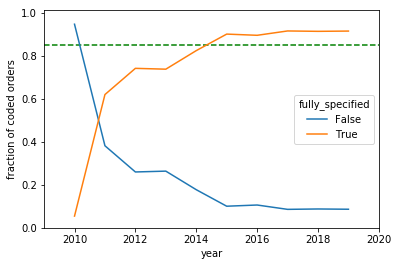

In [15]:
fig, ax = plt.subplots()
df2 = df_tty_orders_by_year[(df_tty_orders_by_year.ORDER_YEAR>2009)&(df_tty_orders_by_year.ORDER_YEAR<2020)]
# df.groupby('TTY').plot(x='ORDER_YEAR', y='f_orders', ax=ax, legend=False)
df2.groupby(['ORDER_YEAR','fully_specified']).sum().f_orders.unstack().plot(ax=ax)
plt.hlines(0.85, 2009, 2020, 'g', 'dashed')
plt.xlim(2009, 2020)
plt.ylim(0,1.01)
plt.ylabel('fraction of coded orders')
plt.xlabel('year')
plt.savefig('frac_rx_order_by_year.png')

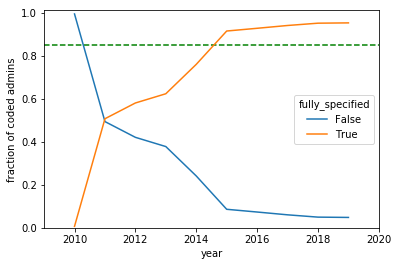

In [16]:
fig, ax = plt.subplots()
df2 = df_tty_admins_by_year[(df_tty_admins_by_year.ADMIN_YEAR>2009)&(df_tty_admins_by_year.ADMIN_YEAR<2020)]
# df.groupby('TTY').plot(x='ORDER_YEAR', y='f_orders', ax=ax, legend=False)
df2.groupby(['ADMIN_YEAR','fully_specified']).sum().f_admins.unstack().plot(ax=ax)
plt.hlines(0.85, 2009, 2020, 'g', 'dashed')
plt.xlim(2009, 2020)
plt.ylim(0,1.01)
plt.ylabel('fraction of coded admins')
plt.xlabel('year')
plt.savefig('frac_rx_admin_by_year.png')

In [12]:
df.groupby('fully_specified')[['N_ORDERS', 'N_ADMINS']].sum()/df[['N_ORDERS', 'N_ADMINS']].sum()

N_ORDERS  N_ADMINS
fully_specified                    
False            0.172586  0.213969
True             0.827414  0.786031